# Intro to Data Manipulation and Pandas
**Dan Tamayo**

*Material draws from a [blog](http://www.ultravioletanalytics.com/2014/10/30/kaggle-titanic-competition-part-i-intro/) working through the Titanic dataset by Dave Novelli, as well as the [Pandas Cookbook](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) by Julia Evans*


# Follow Along

In a terminal, navigate to the directory where you want to add the MachineLearning folder.  Then

    cd MachineLearning/Day2
    source activate ml
    jupyter notebook TitanicPandas.ipynb

# Loading a Dataset

In [41]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/train.csv')

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [44]:
df.shape

(891, 12)

# Magic Pandas

# Selecting Columns

In [45]:
df['Fare'].head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [46]:
df[['Fare', 'Sex']].head()

,Fare,Sex
0,7.2500,male
1,71.2833,female
2,7.9250,female
3,53.1000,female
4,8.0500,male


# Data at a glance

In [47]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [48]:
df['Age'].median()

28.0

# Plotting

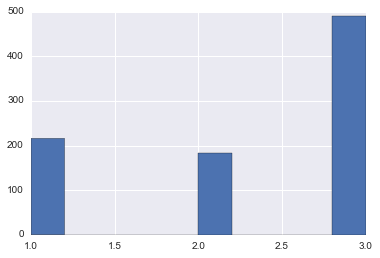

In [49]:
%matplotlib inline
import seaborn
fig = df['Pclass'].hist()

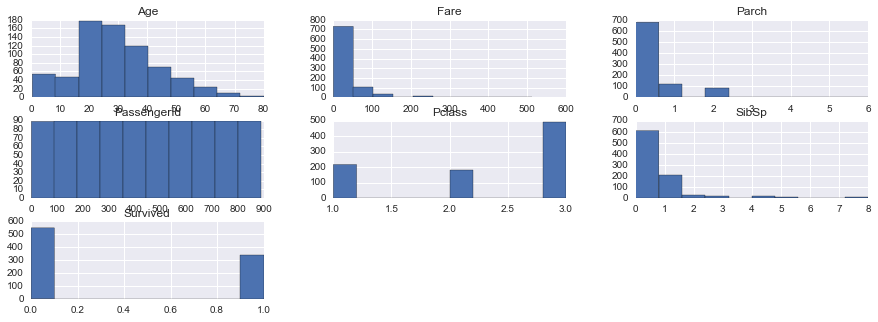

In [50]:
fig = df.hist(figsize=(15,5))

# Filtering

In [51]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Boolean Masks

In [52]:
mask = df['Embarked'] == 'C'
mask.head()

0    False
1     True
2    False
3    False
4    False
Name: Embarked, dtype: bool

# Filtering Dataframes

In [53]:
df_filter = df[mask] # df_filter = df[df['Embarked'] == 'C']
df_filter.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C


# Memory Issues

In [54]:
df_filter = df.loc[df['Embarked'] == 'C']
df_filter.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C


# Selecting specific columns

df.loc[criterion, columns]

In [55]:
test = df.loc[df['Age'] > 30., ['Age', 'Fare', 'Sex']]
test.head()

,Age,Fare,Sex
1,38.0,71.2833,female
3,35.0,53.1000,female
4,35.0,8.0500,male
6,54.0,51.8625,male
11,58.0,26.5500,female


# Combining criteria / columns

In [56]:
test = df.loc[(df['Age'] > 30.) & (df['Fare'] < 50.), 'Age':'Fare']
test.head()

,Age,SibSp,Parch,Ticket,Fare
4,35.0,0,0,373450,8.050
11,58.0,0,0,113783,26.550
13,39.0,1,5,347082,31.275
15,55.0,0,0,248706,16.000
18,31.0,1,0,345763,18.000


# Requirements for working with data in scikit-learn

1. Features should not have missing values
2. Features and response should be numeric
3. Features and response should be NumPy arrays
4. Features and response are separate objects
5. Features and response should have specific shapes

# Requirements for working with data in scikit-learn

1. **Features should not have missing values**
2. Features and response should be numeric
3. Features and response should be NumPy arrays
4. Features and response are separate objects
5. Features and response should have specific shapes

# How to Find Missing Values

In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Wrong way:

In [58]:
df[df['Cabin'] != np.nan]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Right Way:

In [59]:
df.loc[df['Cabin'].notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


# Approach 1:  Throw out any rows with missing data values

In [60]:
df.notnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,True,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,False,True


In [61]:
df_filter = df.loc[df.notnull().all(axis=1)]

# How much data is left?

In [62]:
df_filter.shape

(183, 12)

# Approach 2:  Assign missing identifier

In [63]:
df.loc[df['Cabin'].isnull(), 'Cabin'] = 'U0'
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


# Approach 3: Assign the average/median/mode value

In [64]:
df.loc[df['Fare'].isnull()].shape

(0, 12)

In [65]:
df['Fare'].median()

14.4542

In [66]:
df.loc[df['Fare'].isnull(), 'Fare'] = df['Fare'].median()

# Categorical Variables

In [67]:
df.loc[df['Embarked'].isnull()].shape

(2, 12)

In [68]:
df['Embarked'].mode()

0    S
dtype: object

In [69]:
df['Embarked'].mode()[0]

'S'

In [70]:
df.loc[df['Embarked'].isnull(), 'Embarked'] = df['Embarked'].dropna().mode()[0]

# Approach 4: Fit a regression model to predict missing values

In [71]:
for col in df.columns:
    print("NaNs in column {0} = {1}".format(col, df.loc[df[col].isnull()].shape[0]))

NaNs in column PassengerId = 0
NaNs in column Survived = 0
NaNs in column Pclass = 0
NaNs in column Name = 0
NaNs in column Sex = 0
NaNs in column Age = 177
NaNs in column SibSp = 0
NaNs in column Parch = 0
NaNs in column Ticket = 0
NaNs in column Fare = 0
NaNs in column Cabin = 0
NaNs in column Embarked = 0


In [72]:
df.loc[df['Age'].isnull(), 'Age'] = df['Age'].mean()

# Requirements for working with data in scikit-learn

1. Features should not have missing values
2. **Features and response should be numeric**
3. Features and response should be NumPy arrays
4. Features and response are separate objects
5. Features and response should have specific shapes

In [73]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


# Approach 1:  Creating Dummy (Binary) Variables

In [74]:
print(df['Embarked'].unique())

['S' 'C' 'Q']


In [75]:
dummies_df = pd.get_dummies(df['Embarked'])
dummies_df.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [76]:
def addEmbarked(name):
    return 'Embarked_' + name
dummies_df = dummies_df.rename(columns=addEmbarked)
dummies_df.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [77]:
df = pd.concat([df, dummies_df], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,0.0,0.0,1.0


# Approach 2: Factorizing (Make single multi-class feature)

In [78]:
df['EmbarkedNum'] = pd.factorize(df['Embarked'])[0]
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,EmbarkedNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S,0.0,0.0,1.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1.0,0.0,0.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S,0.0,0.0,1.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0.0,0.0,1.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S,0.0,0.0,1.0,0
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,U0,Q,0.0,1.0,0.0,2


# Continuous Features: Feature Scaling

![Training data](images/04_knn_dataset.png)

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df[['Age', 'Fare']]) # .fit(df) to scale all numerical columns
print("Means = {0}".format(scaler.mean_))
print("Stdevs = {0}".format(scaler.scale_))
df[['Age', 'Fare']] = scaler.transform(df[['Age', 'Fare']])
df.head()

Means = [ 29.69911765  32.20420797]
Stdevs = [ 12.99471687  49.66553444]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,EmbarkedNum
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.592481,1,0,A/5 21171,-0.502445,U0,S,0.0,0.0,1.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.638789,1,0,PC 17599,0.786845,C85,C,1.0,0.0,0.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.284663,0,0,STON/O2. 3101282,-0.488854,U0,S,0.0,0.0,1.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.407926,1,0,113803,0.420730,C123,S,0.0,0.0,1.0,0
4,5,0,3,"Allen, Mr. William Henry",male,0.407926,0,0,373450,-0.486337,U0,S,0.0,0.0,1.0,0


# What are the classes?

In [80]:
pd.factorize(df['Sex'])

(array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
        0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
        0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,

In [81]:
df['Female'] = pd.factorize(df['Sex'])[0]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,EmbarkedNum,Female
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.592481,1,0,A/5 21171,-0.502445,U0,S,0.0,0.0,1.0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.638789,1,0,PC 17599,0.786845,C85,C,1.0,0.0,0.0,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.284663,0,0,STON/O2. 3101282,-0.488854,U0,S,0.0,0.0,1.0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.407926,1,0,113803,0.420730,C123,S,0.0,0.0,1.0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,0.407926,0,0,373450,-0.486337,U0,S,0.0,0.0,1.0,0,0


# Requirements for working with data in scikit-learn

1. Features should not have missing values
2. Features and response should be numeric
3. **Features and response should be NumPy arrays**
4. Features and response are separate objects
5. Features and response should have specific shapes

# Underneath, Pandas series are numpy arrays

In [82]:
fares = df['Fare'].values
type(fares)

numpy.ndarray

# Getting a pipeline ready for sklearn

# Combining Data Frames

In [83]:
submit_df = pd.read_csv('data/test.csv')
submit_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [84]:
input_df = pd.read_csv('data/train.csv')
input_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Indexing

In [85]:
submit_df = pd.read_csv('data/test.csv', index_col=0)
submit_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [86]:
input_df = pd.read_csv('data/train.csv', index_col=0)
submit_df = pd.read_csv('data/test.csv', index_col=0)
df = pd.concat([input_df, submit_df])
df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,NaN,A.5. 3236
1306,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1,female,0,NaN,PC 17758
1307,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,male,0,NaN,SOTON/O.Q. 3101262
1308,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,3,male,0,NaN,359309
1309,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,3,male,1,NaN,2668


In [87]:
print(df.shape[1], "columns")
print(df.shape[0], "rows")
print(df.columns.values)

11 columns
1309 rows
['Age' 'Cabin' 'Embarked' 'Fare' 'Name' 'Parch' 'Pclass' 'Sex' 'SibSp'
 'Survived' 'Ticket']


# Putting it all together

In [88]:
def process_data(df):
    df['Female'] = pd.factorize(df['Sex'])[0]
    df.loc[df['Age'].isnull(), 'Age'] = df['Age'].mean()
    df.loc[df['Fare'].isnull(), 'Fare'] = df['Fare'].median()
    df.loc[df['Cabin'].isnull(), 'Cabin'] = 'U0'
    df.loc[df['Embarked'].isnull(), 'Embarked'] = df['Embarked'].dropna().mode()[0]
    
    dummies_df = pd.get_dummies(df['Embarked'])
    def addEmbarked(name):
        return 'Embarked_' + name
    dummies_df = dummies_df.rename(columns=addEmbarked)
    df = pd.concat([df, dummies_df], axis=1)
    df['EmbarkedNum'] = pd.factorize(df['Embarked'])[0]
    
    return df

In [89]:
df = process_data(df)
df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Female,Embarked_C,Embarked_Q,Embarked_S,EmbarkedNum
PassengerId,,,,,,,,,,,,,,,,
1305,29.881138,U0,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,NaN,A.5. 3236,0,0.0,0.0,1.0,0
1306,39.000000,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1,female,0,NaN,PC 17758,1,1.0,0.0,0.0,1
1307,38.500000,U0,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,male,0,NaN,SOTON/O.Q. 3101262,0,0.0,0.0,1.0,0
1308,29.881138,U0,S,8.0500,"Ware, Mr. Frederick",0,3,male,0,NaN,359309,0,0.0,0.0,1.0,0
1309,29.881138,U0,C,22.3583,"Peter, Master. Michael J",1,3,male,1,NaN,2668,0,1.0,0.0,0.0,1


In [90]:
features = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Female', 'EmbarkedNum']
df_test = df.loc[df['Survived'].isnull(), features]
df_train = df.loc[df['Survived'].notnull(), features+['Survived']]

In [91]:
df_train.head()

,Age,Fare,Parch,Pclass,SibSp,Female,EmbarkedNum,Survived
PassengerId,,,,,,,,
1,22.0,7.2500,0,3,1,0,0,0.0
2,38.0,71.2833,0,1,1,1,1,1.0
3,26.0,7.9250,0,3,0,1,0,1.0
4,35.0,53.1000,0,1,1,1,0,1.0
5,35.0,8.0500,0,3,0,0,0,0.0


# Requirements for working with data in scikit-learn

1. Features should not have missing values
2. Features and response should be numeric
3. Features and response should be NumPy arrays
4. **Features and response are separate objects**
5. **Features and response should have specific shapes**

In [92]:
X_train = df_train[features].values
y_train = df_train['Survived'].values
print(X_train[0:5])
print(y_train[0:5])
print("X has {0} rows".format(X_train.shape[0]))
print("y has {0} rows".format(y_train.shape[0]))

[[ 22.       7.25     0.       3.       1.       0.       0.    ]
 [ 38.      71.2833   0.       1.       1.       1.       1.    ]
 [ 26.       7.925    0.       3.       0.       1.       0.    ]
 [ 35.      53.1      0.       1.       1.       1.       0.    ]
 [ 35.       8.05     0.       3.       0.       0.       0.    ]]
[ 0.  1.  1.  1.  0.]
X has 891 rows
y has 891 rows


# Feature Engineering

# Parsing Alphanumeric Features

In [93]:
df['Cabin'].unique()

array(['U0', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24'

![TitanicPlans](images/titanicplans.jpg)

# Regular Expressions

In [94]:
import re
def getDeck(cabin):
    match = re.search("([A-Z])", cabin)
    return match.group(1) if match is not None else None
def getCabinNum(cabin):
    match = re.search("([0-9]+)", cabin)
    return match.group(1) if match is not None else None
print(getDeck('C237'))
print(getCabinNum('C237'))

C
237


![regex](images/regular_expressions_cheat_sheet.png)

# Apply a function to all rows to generate a new feature

In [95]:
df['Deck'] = df['Cabin'].map(getDeck)
df['CabinNum'] = df['Cabin'].map(getCabinNum)
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Female,Embarked_C,Embarked_Q,Embarked_S,EmbarkedNum,Deck,CabinNum
PassengerId,,,,,,,,,,,,,,,,,,
1,22.0,U0,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,0,0.0,0.0,1.0,0,U,0
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,1,1.0,0.0,0.0,1,C,85
3,26.0,U0,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,1,0.0,0.0,1.0,0,U,0
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803,1,0.0,0.0,1.0,0,C,123
5,35.0,U0,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450,0,0.0,0.0,1.0,0,U,0


In [96]:
df['CabinNum'].isnull().value_counts()

False    1303
True        6
Name: CabinNum, dtype: int64

In [97]:
df.loc[df['CabinNum'].isnull(), 'CabinNum'] = 0

In [98]:
df['Deck'].isnull().value_counts()

False    1309
Name: Deck, dtype: int64

In [99]:
df['DeckNum'] = pd.factorize(df['Deck'])[0]

# What to do with the name?

# Number of names

In [100]:
testname = df.loc[1, 'Name']
print(testname)

Braund, Mr. Owen Harris


In [101]:
re.split(' ', testname)

['Braund,', 'Mr.', 'Owen', 'Harris']

In [102]:
def numNames(name):
    return len(re.split(' ', name))

df['NumNames'] = df['Name'].map(numNames)
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Female,Embarked_C,Embarked_Q,Embarked_S,EmbarkedNum,Deck,CabinNum,DeckNum,NumNames
PassengerId,,,,,,,,,,,,,,,,,,,,
1,22.0,U0,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,0,0.0,0.0,1.0,0,U,0,0,4
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,1,1.0,0.0,0.0,1,C,85,1,7
3,26.0,U0,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,1,0.0,0.0,1.0,0,U,0,0,3
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803,1,0.0,0.0,1.0,0,C,123,1,7
5,35.0,U0,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450,0,0.0,0.0,1.0,0,U,0,0,4


# Title

In [103]:
testname

'Braund, Mr. Owen Harris'

In [104]:
re.search(", (.+?)\.", testname).group(1)

'Mr'

In [105]:
def getTitle(name):
    match = re.search(", (.*?)\.", name)
    return match.group(1) if match is not None else None

df['Title'] = df['Name'].map(getTitle)
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,...,Female,Embarked_C,Embarked_Q,Embarked_S,EmbarkedNum,Deck,CabinNum,DeckNum,NumNames,Title
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,U0,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,...,0,0.0,0.0,1.0,0,U,0,0,4,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,...,1,1.0,0.0,0.0,1,C,85,1,7,Mrs
3,26.0,U0,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,...,1,0.0,0.0,1.0,0,U,0,0,3,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,...,1,0.0,0.0,1.0,0,C,123,1,7,Mrs
5,35.0,U0,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,...,0,0.0,0.0,1.0,0,U,0,0,4,Mr


In [106]:
df.loc[df['Title'] == 'Jonkheer', 'Title'] = 'Master'
df.loc[df['Title'].isin(['Ms', 'Mlle']), 'Title'] = 'Miss'
df.loc[df['Title'] == 'Mme', 'Title'] = 'Mrs'
df.loc[df['Title'].isin(['Capt', 'Don', 'Major', 'Col', 'Sir']), 'Title'] = 'Sir'
df.loc[df['Title'].isin(['Dona', 'Lady', 'the Countess']), 'Title'] = 'Lady'
df['Title'].value_counts()

Mr        757
Miss      264
Mrs       198
Master     62
Sir         9
Dr          8
Rev         8
Lady        3
Name: Title, dtype: int64

In [107]:
df = pd.concat([df, pd.get_dummies(df['Title']).rename(columns=lambda x: 'Title_' + str(x))], axis=1)

In [108]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,...,NumNames,Title,Title_Dr,Title_Lady,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Title_Sir
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,U0,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,...,4,Mr,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,...,7,Mrs,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,26.0,U0,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,...,3,Miss,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,...,7,Mrs,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,35.0,U0,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,...,4,Mr,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Final Data Processing Pipeline

In [109]:
def process_data(df):
    df['Female'] = pd.factorize(df['Sex'])[0]
    df.loc[df['Age'].isnull(), 'Age'] = df['Age'].mean()
    df.loc[df['Fare'].isnull(), 'Fare'] = df['Fare'].median()
    df.loc[df['Cabin'].isnull(), 'Cabin'] = 'U0'
    df.loc[df['Embarked'].isnull(), 'Embarked'] = df['Embarked'].dropna().mode()[0]
    
    dummies_df = pd.get_dummies(df['Embarked'])
    def addEmbarked(name):
        return 'Embarked_' + name
    dummies_df = dummies_df.rename(columns=addEmbarked)
    df = pd.concat([df, dummies_df], axis=1)
    df['EmbarkedNum'] = pd.factorize(df['Embarked'])[0]
    
    import re
    def getDeck(cabin):
        match = re.search("([A-Z])", cabin)
        return match.group(1) if match is not None else None
    def getCabinNum(cabin):
        match = re.search("([0-9]+)", cabin)
        return match.group(1) if match is not None else None
    
    df['Deck'] = df['Cabin'].map(getDeck)
    df['DeckNum'] = pd.factorize(df['Deck'])[0]
    df['CabinNum'] = df['Cabin'].map(getCabinNum)
    df.loc[df['CabinNum'].isnull(), 'CabinNum'] = 0
    
    def numNames(name):
        return len(re.split(' ', name))
    df['NumNames'] = df['Name'].map(numNames)
    
    def getTitle(name):
        match = re.search(", (.*?)\.", name)
        return match.group(1) if match is not None else None
    df['Title'] = df['Name'].map(getTitle)
    
    df.loc[df['Title'] == 'Jonkheer', 'Title'] = 'Master'
    df.loc[df['Title'].isin(['Ms', 'Mlle']), 'Title'] = 'Miss'
    df.loc[df['Title'] == 'Mme', 'Title'] = 'Mrs'
    df.loc[df['Title'].isin(['Capt', 'Don', 'Major', 'Col', 'Sir']), 'Title'] = 'Sir'
    df.loc[df['Title'].isin(['Dona', 'Lady', 'the Countess']), 'Title'] = 'Lady'
    df = pd.concat([df, pd.get_dummies(df['Title']).rename(columns=lambda x: 'Title_' + str(x))], axis=1)
    
    return df

In [110]:
input_df = pd.read_csv('data/train.csv', index_col=0)
submit_df = pd.read_csv('data/test.csv', index_col=0)
df = pd.concat([input_df, submit_df])
df = process_data(df)

features = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Female', 'EmbarkedNum', 'DeckNum', 'CabinNum', 'NumNames', 'Title_Dr','Title_Lady','Title_Master','Title_Miss','Title_Mr','Title_Mrs','Title_Rev','Title_Sir']
df_test = df.loc[df['Survived'].isnull(), features]
df_train = df.loc[df['Survived'].notnull(), features+['Survived']]

df_train.to_csv('data/train_processed.csv') # NOT FEATURE SCALED!
df_test.to_csv('data/test_processed.csv')